# Introduction

## Mitosis and Cancer 
The process by which a cell reproduces to create two identical copies of itself is known as mitosis. Cancer is essentially a disease of mitosis - the normal 'checkpoints' regulating mitosis are ignored or overridden by the cancer cell due to occurrence of gene mutations.Once these crucial cell cycle genes start behaving abnormally, cancer cells start to proliferate wildly by repeated, uncontrolled mitosis!

#### Mitotic Activity Index (MAI) 
It is an important independent prognostic factor and an integral part of the breast cancer grading system. 
MAI is defined as the numbers of mitotic figures in a given area of tumor. Mitotic activity detects the mitotic rate which describes how quickly the cancer cells are multiplying or dividing using a 1 to 3 scale, 1 being the slowest, 3 the most rapid.


The aggressive nature of this reproduction of the mitosis cells given us an idea how aggressive the the tumour of the cancer is in the patient. 

#### How is the MAI scored


Traditionally, MAI is scored on glass slides using light microscopy where mitosis is counted in 10 high power fields (40× magnification) or per unit area (2 mm2) in the most active part of the tumor. 
Scoring MAI under a microscope requires the differentiation of true mitoses from similar figures such as apoptotic bodies, dark nuclei and tissue artifacts, for which a three-dimensional view and a fine microscopic focusing is required!

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3875418/

The Histopathlogist are responsible for viewing these slides and decideing upon the mitosis in the given slides so as to know how many mitosis are detected in the given slide. This would help them to grade the mitotic rate in the gievn slide.

# Obejective

The given objective of the task is to help the Histopathologist by developing an algorithm which could help them identify the mitosis in a given slide and can also give them a count in that particular slide.

### Dataset

The data we have received is of H&E stained histological images of different breast cancers prepared on 5 slides and each slide is scanned on two scanners. The data contains a total of about 50 images with a given mask for the patches where the mitosis are present in the image. 

We would need to build a model using this training dataset which can help us detect the mitosis presetn in a given image and also count it for us. 


# How would you approach the above problem?

As we are dealing with Images here we will ues the some proven algorithm in the field of Deep Learing which can learn and access these images and help us achive our goal. We would be making use of Convolutional Neural Networks, a technique which makes use of convolutions, feature extraction and dense networks to help us understand the training images and draw conclusions on them.

This being a Computer vision problem we need to understand under what category can this problem falls, is this a classification problem, an object detection problem or semantic segmentation problem.

As our main objective is to differentiate the mitosis cells in the image also considering the fact there are many similar stuructures in the image, we will use Semantic Segmentation approach to solve our problem.

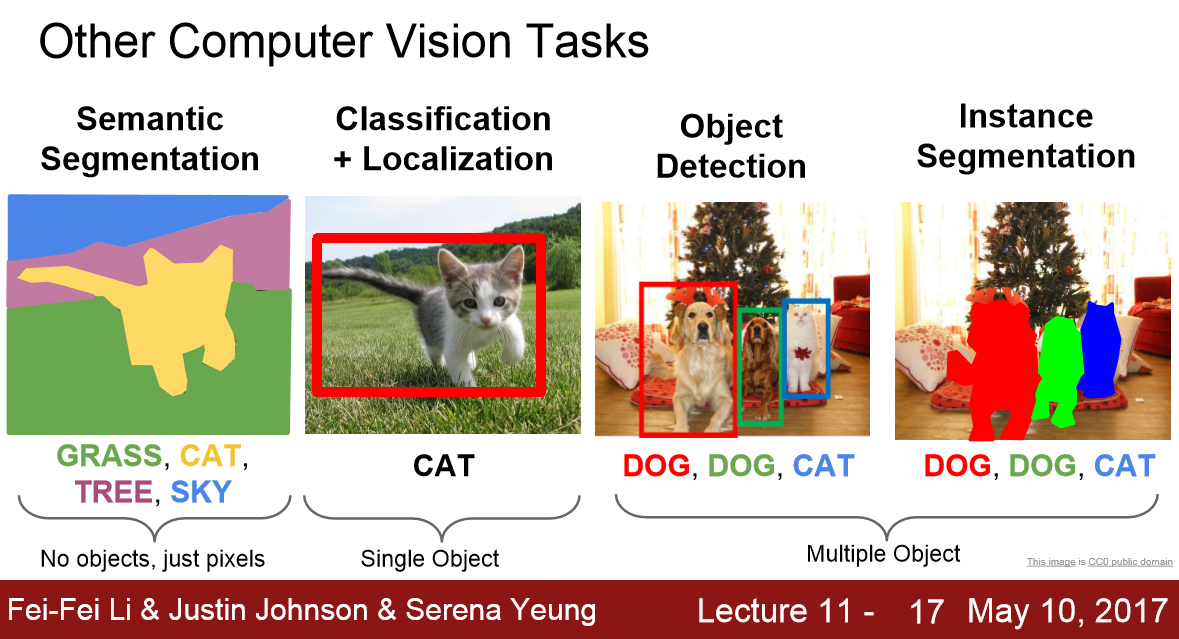

In [4]:
from IPython.display import Image
Image(filename='C:/Users/SAHIL/Desktop/59b6d0529299e.png')

source: Stanford school of engineering, computer vision course

### Semantic Segmentation

The goal of semantic image segmentation is to label each pixel of an image with a corresponding class of what is being represented. Because we're predicting for every pixel in the image, it is kind of computationally expensive.

Semantic segmentation is the partition of an image into coherent parts. For example classifying each pixel that belongs to a person, a car, a tree or any other entity in our dataset.

### Using Unet as the architecture 

source: https://arxiv.org/pdf/1505.04597.pdf

We would be using the Unet architecture which consist of an encoder and a decoder network. The network does not have fully connected layers in it, infact when we reach the point in the encoder (which is a basic Convolutional Neural Network) where we flatten our layer we again start the the upsampling of the layer to form a complete image as the output.

The trick in the UNet architecture is that we save the actuivations from time to time at the point where we reduce the size of the size of the image and pass on these activations in the corresponsing upsampling or decoder network which are then concatenated to the image.

Also we will make use of **Transfer Learning** in this part where our encoder will be using the pretrained weights of a model build on Imagenet - we can make use  of Resnet architecture here as it also makes use of Resnet blocks a proven technique to improve performance of a model.  Sp our encoder will we based on the Transfer Learning using the Resnet architecture. 

We will learn more about this network in the later section

# Why are you chosing this approach?

As the task in Semantic Segmentation is to simply predict the class of each pixel in an image and our problem we would like to classify our image pizel having a mitosis probability and not we would go with this approach of Semantic Segmentation

# What are the advantages and shortcomings of your approach?

** Advantages **

The advantage of using a Semantic segmentation over here is that we would tend to get the perfect shape of the mitosis cell in the image rather than getting a bounding box in case of object detection.

This will help us in understanding the structure of the mitosis cell nicely


Another advantage of using Semantic Segmentation over Instance segmentation is that as these bodies of cells are considered to be a single structure and should not be differentiated as different variety of cells we can go for Semantic Segmentation.

**Shortcomings:** The biggest disadvantage of Semantic Segemntation in our case can be something what we call as Weak Labels ie what if the training dataset had labels not is form of patches in the iamge but only a point as a centroid of the mitosis. How would we deal with this kind of dataset as it wont have a mask associated with it.

# Would there be feasible alternatives?

To overcome the shortcoming of this approach which was what of we have weak labels given in the dataset ie: only the centroids of the mitosis cells are goven and not the cell structure than how would we move forwards, we can actually use a hybrod approach mentioned in this paper which I found to be very interesting:

https://cis.temple.edu/~latecki/Papers/MIA2018.pdf

It mainly consists of three components. A deep detection model(DeepDet) produces primary detection results. A deep verification model (DeepVer) verifies these detections and eliminates false positives. In addition, for the weak annotations that do not
provide pixel-level labels, we utilize a deep segmentation model (DeepSeg) to segment the images and obtain estimated bounding
boxes annotations.

# How would you further improve the method? 

We can use different techniques to improve the process and get better results:
    
#### Image augmentation:

As we have a limited set of images with us and though we are using trasnfer Learning it does not harm us to maybe use some image augmentation and improve the size of the dataset by introducing number of variations in the dataset.

Important point to condiser while doing Image augmentation is that if we are maybe rotating the training image by a certain angle we need to make sure that we also rotate the masking image by that angle as well. Because it will be actually telling us about the training image right, so any changes made to the training image we should also make them for the msking image.

#### Progressive Resizing:
Progressive Resizing is a techinique which I learnt in the Fasyai course and it tends to work really well. 

What we do in this case is that after resiizing the images to a size which we are comfortable with for ex : (224, 224) we build a model on this and save the weights of that model then we increase the size of the of the input image now ex : (324, 324) and then maybe to (512, 512) and then (764, 764)

This actually helps us get a better resuly, something which I have tried in the past and it tends to work. For reference please look at the fast ai course.

https://miguel-data-sc.github.io/2017-11-23-second/


#### Discrimitative Learning rates:

As we are using the Transfer Learning it becomes very important that we dont change the weights of the lower layers as they are very good with finding edges, gradients etc which you expect in every image. SO the Learning rate for those layers hould be very small and the learning rate for the above layers should be comparitively high. for ex: 1e-5 for all the lower layers and 1e-3 for the above layers which we want them to learn. In particular the features of the given image dataset



# How would you implement the approach? Sketch it.

To implement the process, we would divide our approach in three phases the:
 - Data understanding and PreProcessing
 - Selecting the model and implementing (Data Augmentation)
 - Post Processing

## Data Understanding and Preprocessing

The data that we are given consists of about 40 - 50 images for Scanner A and same amount if images for scanner H. 

Lets try to keep our approach simple and try building a model for scanner A in the beginning and can then later on see how we can proceed further.

The data for scanner A has **.jpg** and **.png** files with **.csv** for every image in the folder. The .png file in the folder is the training image that we should be feeding in to the model and the .csv file indicates the coordinates of the mitosis present in the particular image. The .jpg is the overlap of both and gives a clear picture of the itosis location present in the image. This is for our reference.  

As we now have a clear idea of data with us, we can now move ahead to process the data - looking at the size of the data chaging it to a particular format if necessary etc. 

**Size of the Image**:

The size of the image given to us is (2084, 2084, 3) where 3 indicates the RGB channels in the images indicating it is a coloured image. The size of the image is really big for feeding into our model and we would surely need to process the image by reducing its size but keeping the features intact. 

We  will make use of the **resize method from skimage.transform** to resize our images to size which we can feed our model ex: (512, 512, 3). Comparitively a smaller size.

#### Using the pixel coordinates in the csv file to create a mask image

As in the dataset we dont have a different image which is masked for training (like camvid) we would have to make a masked image ourselves associating the pixel corodinates location to the input image and creating a mask image out of it.

This needs to be done for using the orginal size of the image and then the masked image can also be resized to (512, 512, 3). This would help us preserve the spatial features and realtionships the masked image has with the training image.

Once we have our data ready in form of Input images:(images that can be fed to the model) and the Masks(The masked image we created using the pixel cooridinates) we can now select the model we can use for segmentation.

**Creating a validation set to test our model is also one of the most important tasks.**

## Selecting the model and Implementing it

As we are dealing with Semantic Segmentation problem the best way to implemtnt the these kind of problems is to use the goto model for all the Segmentation problems the - Unet 

#### Why UNet ?

I chose this model because of the proven trackrecord of using Unet architecture in Segmentation tasks. Also the paper of Unet is the most cited paper in the Miccai conference(Medical Imaging conference) with over 4000 citations.

It is widely used in this domain. It is not only used in the field of Medical imaging but mnay other fields as well. Many competitions on Kaggle have been won using this architecture like 

the Carvan challenge: http://blog.kaggle.com/2017/12/22/carvana-image-masking-first-place-interview/ 

the Data Science bowl for nuclei segmentation : https://www.kaggle.com/c/data-science-bowl-2018/discussion/54741

So it was cleear that this approach of using Unet architecture to segment the mitosis cells from the image and count them would be the best approach to go forward.

### Using Unet as the architecture

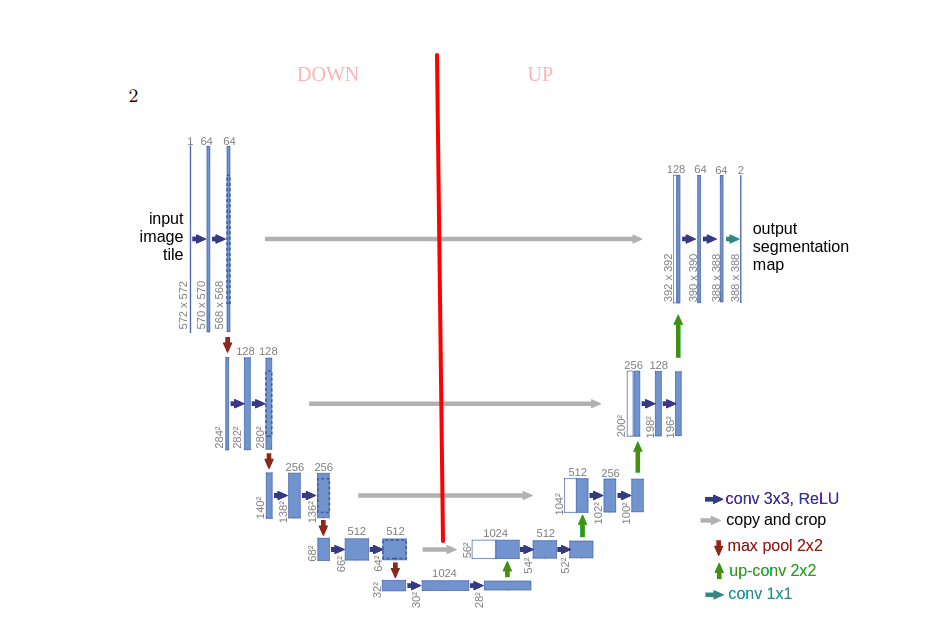

In [7]:
from IPython.display import Image
Image(filename='C:/Users/SAHIL/Desktop/Unet.png')

#### Understanding the Unet architecture and the small tweaks we can introduce to make our model better

The UNet architecture consist of mainly two parts:
    
** Downward Part / ENCODER ** and the ** Upward Path / Decoder** 







### ENCODER

The encoder part in the UNet architecctire is the normal convolutional Neural network we build for classification problems just without the fully connected Layers.

As we see in the picture above we perform a convolution of (3 x 3) on the image and then add the non-linearity layer to it in the form of ReLU. We loose pixel there as we dont perform padding

We then make use of the MAX POOl with a stride 2 so as to reduce the size but at the same time we also increase the number of feature maps in the architecture. Then we again follow the same procedure of convolution and Relu but with increase in activation maps.

** Important Point ** :
The most important point to note here and which forms the crux of UNet is that we save the feature maps after every reduction of size so that it can be propogated to the other side while Upsampling. This helps the decoder to also have the information from the encoder while upsampling of the image.

This process of convoliton, Relu and then size reduction is followed until we reach a small size with great number of feature maps.

#### Using Transfer Learning in Encoder

As we need to use the normal CNN in the encoder we can surely make of use of the pretrained models trained on Imagenet datasets as they can help us achieve better results in generalizing the features.

We would make use of Resnet-34 architecture her which also makes use of Resnet blocks a trick used in the (Kaiming He et al) : https://arxiv.org/abs/1512.03385

This would give us an extra edge in the encoding part.

**Why Transfer Learning works?**
THough our problem is not even remotely connected to the images present on the Imagenet dataset(on which the model is built) but when training the CNN learns a lot in the lower layers (early layers of the network) about differetn shapes, gradients, lines etc. These learning are not only important there but are applicable to any image present as they form the basis of any image. 

These learning that we have in the lower layers can be used on different datasets. Hence we see transfer learning works almost all the times on any given data.



### Decoder

The decoder part of the network consists of upsample and concatenation followed by regular convolution operations. 

We are expanding the feature dimensions to meet the same size with the corresponding concatenation blocks from the left. You can see the gray and green arrows, where we concatenate two feature maps together.

** The main contribution of U-Net in this sense compared to other fully convolutional segmentation networks is that while upsampling and going deeper in the network we are concatenating the higher resolution features from down part with the upsampled features in order to better localize and learn representations with following convolutions. **

Since upsampling is a sparse operation we need a good prior from earlier stages to better represent the localization. Similar idea of combining matching levels is also seen in FPNs (Feature Pyramidal Networks)

From the figure above we can say that the only different operation we are performing here is that of a Upconvolution. How do we do that? There are methods by which we can do this like the Nearest Neighbours, Bilinear interpolation or the most used Transpose Convolution, which we will be using in our case.

**Nearest Neighbours:**

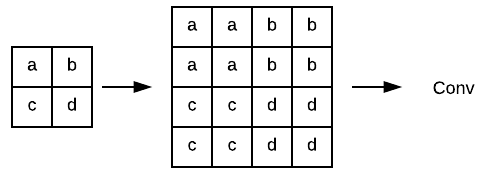

In [8]:
from IPython.display import Image
Image(filename='C:/Users/SAHIL/Desktop/Nearest_neighbour.png')

It is just copying those pixels in a new 4 x 4 matrix like this. So now we scale up from 2x 2 to 4x4

** Bilinear interpolation**

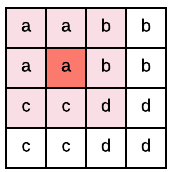

In [9]:
from IPython.display import Image
Image(filename='C:/Users/SAHIL/Desktop/Bilinear_interpolation.png')

So instead of copying A to all those different cells you take a weighted average of the cells around it. For example if you were looking at what should go here (red), it's about 3 A's, 2 C's, 1 D, and 2 B's, and you take the average, not exactly, but roughly just a weighted average.

** Transpose Convolution **

# How would you evaluate the success of your method?

There are different types of evaluation methods which can be used in Semantic Segmentation tasks namely:

**IoU**:
The Intersection over Union (IoU) metric, also referred to as the Jaccard index, is essentially a method to quantify the percent overlap between the target mask and our prediction output

Quite simply, the IoU metric measures the number of pixels common between the target and prediction masks divided by the total number of pixels present across both masks.

$ IoU=target∩prediction / target∪prediction $

**Dice Coeffecient**:
It is the measure of overlap between two samples. This measure ranges from 0 to 1 where a Dice coefficient of 1 denotes perfect and complete overlap. The Dice coefficient was originally developed for binary data, and can be calculated as:

$ Dice=2|A∩B||A|+|B| $

where |A∩B| represents the common elements between sets A and B, and |A| represents the number of elements in set A (and likewise for set B).


We would we using Dice coeffecient as our metric function to understand how good is our model performing on validation set.

# How would you scale your approach to process thousands of images in one minute?

#### Mixed Precision Training
A technique that can work wonders and is available again on Pytorch and compatible with fastai. This technique helps us to train our network faster with half the size and does not require any architecture changes from our end.

A very good source to have a look at this is a blog from of the researchers at fastai: https://forums.fast.ai/t/mixed-precision-training/20720/2

This helps us improve speed and train faster by helping us double the size of our model and also double the batch size in the model.

#### Using NCCL library 

Source: https://devblogs.nvidia.com/fast-multi-gpu-collectives-nccl/

This helps us get a tremendous boost in data parallelism and work more explicitly on computations rather than working or communication assuming you have a server with n number og GPU's.

They use ** Ring-Style Collective. **

But recently the NCCL they introduced ** double Binary trees ** which can help you scale your applications massively

Source: https://devblogs.nvidia.com/massively-scale-deep-learning-training-nccl-2-4/